In [ ]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Slicing

Extract thin planar slices from a volume


In [3]:
# sphinx_gallery_thumbnail_number = 2
import pyvista as pv
from pyvista import examples
import matplotlib.pyplot as plt
import numpy as np

PyVista meshes have several slicing filters bound directly to all datasets.
These filters allow you to slice through a volumetric dataset to extract and
view sections through the volume of data.

One of the most common slicing filters used in PyVista is the
:func:`pyvista.DataSetFilters.slice_orthogonal` filter which creates three
orthogonal slices through the dataset parallel to the three Cartesian planes.
For example, let's slice through the sample geostatistical training image
volume. First, load up the volume and preview it:



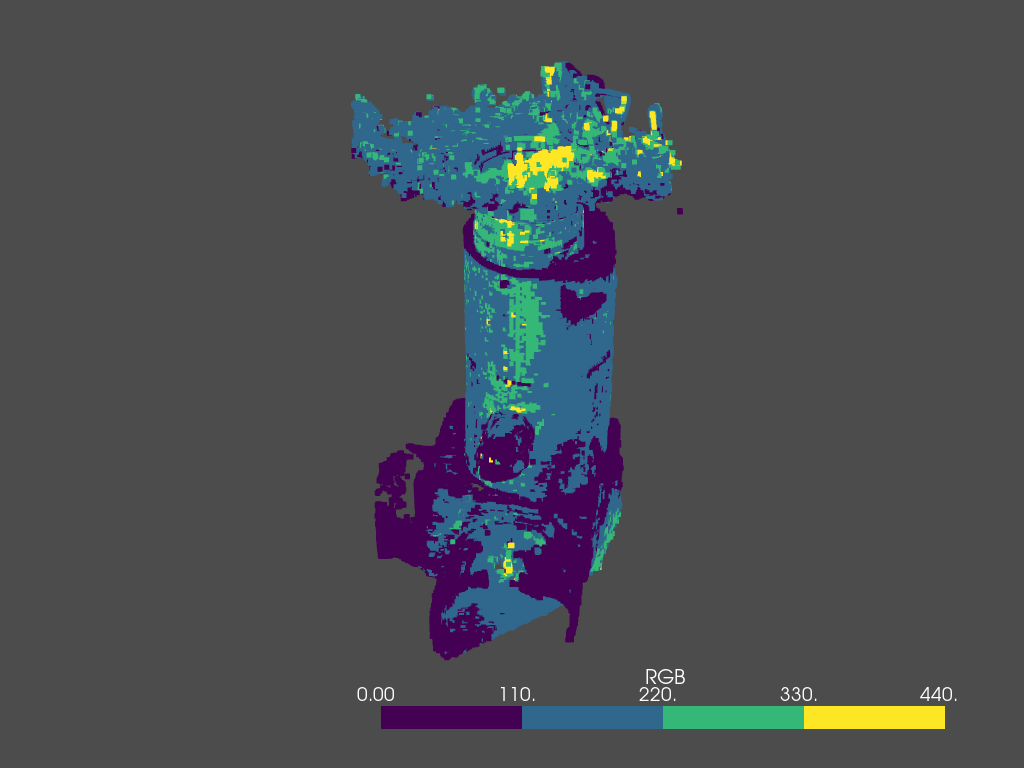

In [11]:
mesh = pv.read('p.ply')

# define a categorical colormap
cmap = plt.cm.get_cmap("viridis", 4)


mesh.plot(cmap=cmap)

In [17]:
print(dir(mesh))

['ALL_PIECES_EXTENT', 'AddCellReference', 'AddObserver', 'AddReferenceToCell', 'Allocate', 'AllocateCellGhostArray', 'AllocateCopy', 'AllocateEstimate', 'AllocateExact', 'AllocatePointGhostArray', 'AllocateProportional', 'AttributeTypes', 'BOUNDING_BOX', 'BreakOnError', 'BuildCellLocator', 'BuildCells', 'BuildLinks', 'BuildLocator', 'BuildPointLocator', 'CELL', 'CELL_DATA_FIELD', 'CELL_DATA_VECTOR', 'CheckAttributes', 'ComputeBounds', 'CopyAttributes', 'CopyCells', 'CopyInformationFromPipeline', 'CopyInformationToPipeline', 'CopyStructure', 'Crop', 'DATA_EXTENT', 'DATA_EXTENT_TYPE', 'DATA_NUMBER_OF_GHOST_LEVELS', 'DATA_NUMBER_OF_PIECES', 'DATA_OBJECT', 'DATA_OBJECT_FIELD', 'DATA_PIECE_NUMBER', 'DATA_TIME_STEP', 'DATA_TYPE_NAME', 'DIRECTION', 'DataHasBeenGenerated', 'DebugOff', 'DebugOn', 'DeepCopy', 'DeleteCell', 'DeleteCells', 'DeleteLinks', 'DeletePoint', 'EDGE', 'EDGE_DATA_VECTOR', 'ERR_INCORRECT_FIELD', 'ERR_NON_MANIFOLD_STAR', 'ERR_NO_SUCH_FIELD', 'EditableOff', 'EditableOn', 'FIE

In [54]:
print(dir(mesh.slice()))

['ALL_PIECES_EXTENT', 'AddCellReference', 'AddObserver', 'AddReferenceToCell', 'Allocate', 'AllocateCellGhostArray', 'AllocateCopy', 'AllocateEstimate', 'AllocateExact', 'AllocatePointGhostArray', 'AllocateProportional', 'AttributeTypes', 'BOUNDING_BOX', 'BreakOnError', 'BuildCellLocator', 'BuildCells', 'BuildLinks', 'BuildLocator', 'BuildPointLocator', 'CELL', 'CELL_DATA_FIELD', 'CELL_DATA_VECTOR', 'CheckAttributes', 'ComputeBounds', 'CopyAttributes', 'CopyCells', 'CopyInformationFromPipeline', 'CopyInformationToPipeline', 'CopyStructure', 'Crop', 'DATA_EXTENT', 'DATA_EXTENT_TYPE', 'DATA_NUMBER_OF_GHOST_LEVELS', 'DATA_NUMBER_OF_PIECES', 'DATA_OBJECT', 'DATA_OBJECT_FIELD', 'DATA_PIECE_NUMBER', 'DATA_TIME_STEP', 'DATA_TYPE_NAME', 'DIRECTION', 'DataHasBeenGenerated', 'DebugOff', 'DebugOn', 'DeepCopy', 'DeleteCell', 'DeleteCells', 'DeleteLinks', 'DeletePoint', 'EDGE', 'EDGE_DATA_VECTOR', 'ERR_INCORRECT_FIELD', 'ERR_NON_MANIFOLD_STAR', 'ERR_NO_SUCH_FIELD', 'EditableOff', 'EditableOn', 'FIE

Note that this dataset is a 3D volume and there might be regions within this
volume that we would like to inspect. We can create slices through the mesh
to gain further insight about the internals of the volume.



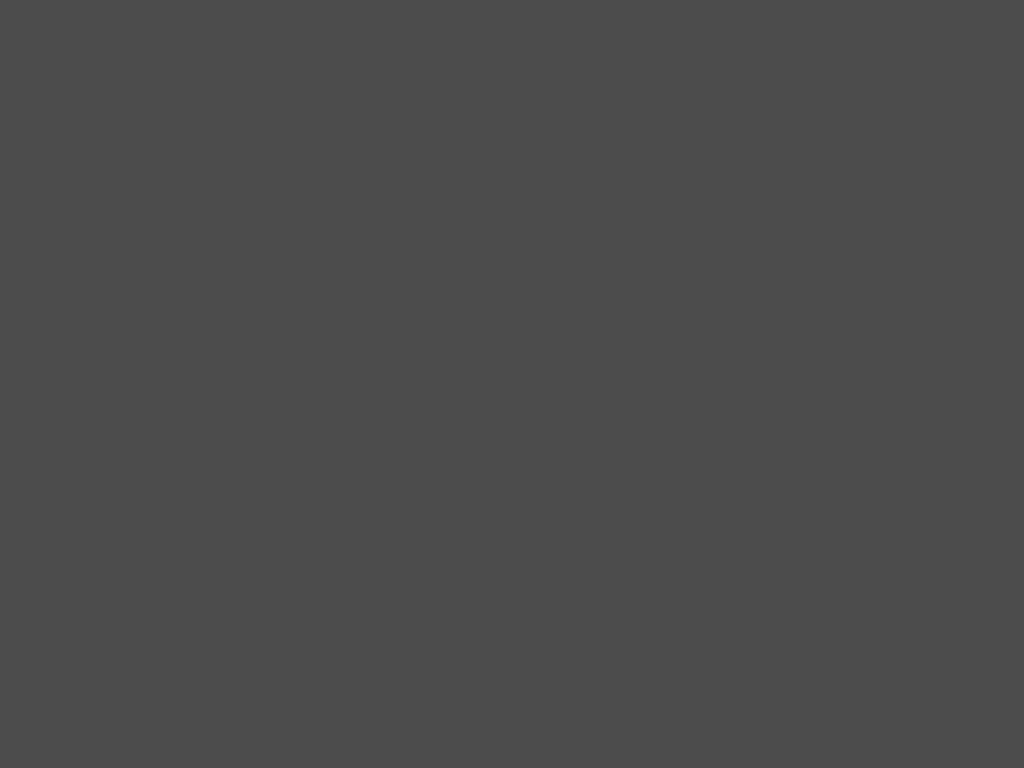

In [46]:

slices = mesh.slice_orthogonal(x=0.2, y=0.3, z=0.1)
slices.plot(cmap=cmap)


In [20]:
mesh.tube

<bound method PolyDataFilters.tube of PolyData (0x7f3146a901c0)
  N Cells:	123992
  N Points:	123992
  X Bounds:	-1.004e+00, 1.135e+00
  Y Bounds:	-1.149e+00, 1.088e+00
  Z Bounds:	-4.104e+00, 3.104e-01
  N Arrays:	2
>

The orthogonal slices can be easily translated throughout the volume:



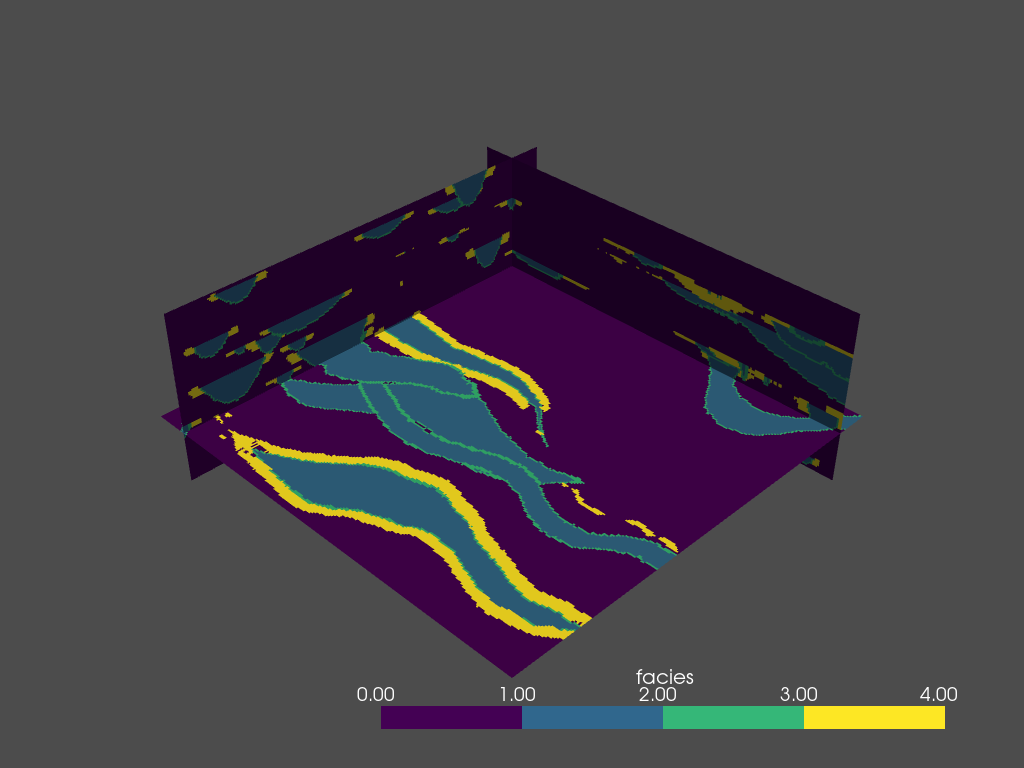

In [6]:
slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap)

We can also add just a single slice of the volume by specifying the origin
and normal of the slicing plane with the :func:`pyvista.DataSetFilters.slice`
filter:



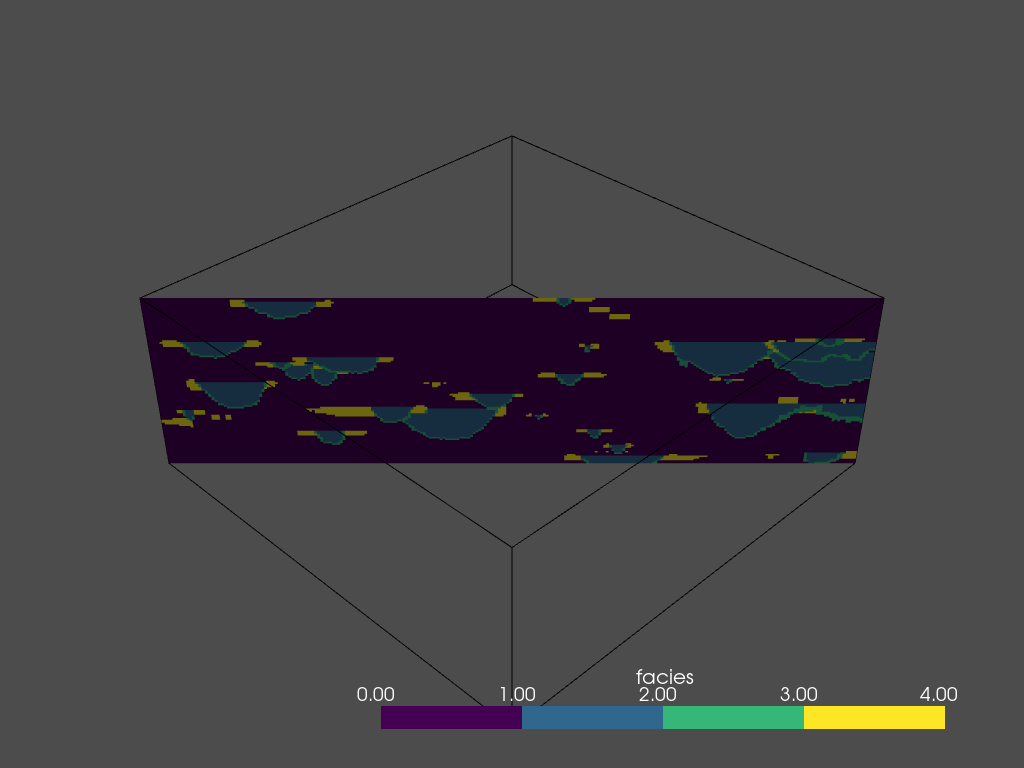

In [7]:
# Single slice - origin defaults to the center of the mesh
single_slice = mesh.slice(normal=[1, 1, 0])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(single_slice, cmap=cmap)
p.show()

Adding slicing planes uniformly across an axial direction can also be
automated with the :func:`pyvista.DataSetFilters.slice_along_axis` filter:



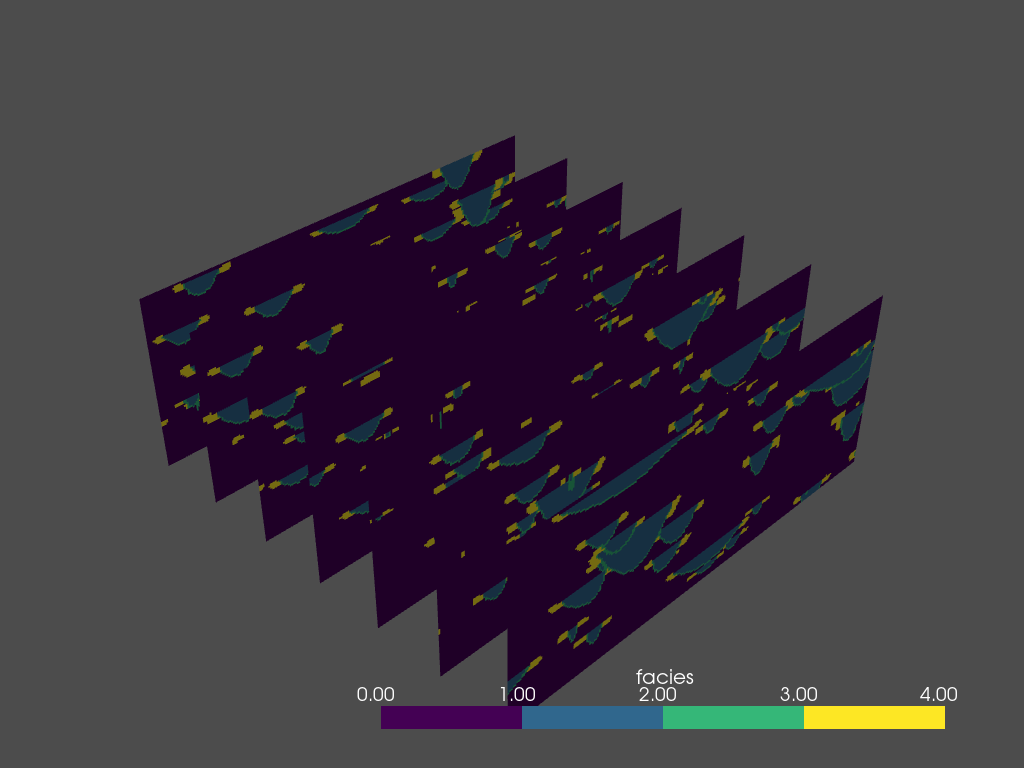

In [8]:
slices = mesh.slice_along_axis(n=7, axis="y")

slices.plot(cmap=cmap)

## Slice Along Line

We can also slice a dataset along a :func:`pyvista.Spline` or
:func:`pyvista.Line` using the :func:`DataSetFilters.slice_along_line` filter.

First, define a line source through the dataset of interest. Please note
that this type of slicing is computationally expensive and might take a while
if there are a lot of points in the line - try to keep the resolution of
the line low.



In [ ]:
model = examples.load_channels()


def path(y):
    """Equation: x = a(y-h)^2 + k"""
    a = 110.0 / 160.0 ** 2
    x = a * y ** 2 + 0.0
    return x, y


x, y = path(np.arange(model.bounds[2], model.bounds[3], 15.0))
zo = np.linspace(9.0, 11.0, num=len(y))
points = np.c_[x, y, zo]
spline = pv.Spline(points, 15)
spline

Then run the filter



In [ ]:
slc = model.slice_along_line(spline)
slc

In [ ]:
p = pv.Plotter()
p.add_mesh(slc, cmap=cmap)
p.add_mesh(model.outline())
p.show(cpos=[1, -1, 1])

## Multiple Slices in Vector Direction

Slice a mesh perpendicularly along a vector direction perpendicularly.



In [ ]:
mesh = examples.download_brain()

# Create vector
vec = np.random.rand(3)
# Normalize the vector
normal = vec / np.linalg.norm(vec)

# Make points along that vector for the extent of your slices
a = mesh.center + normal * mesh.length / 3.0
b = mesh.center - normal * mesh.length / 3.0

# Define the line/points for the slices
n_slices = 5
line = pv.Line(a, b, n_slices)

# Generate all of the slices
slices = pv.MultiBlock()
for point in line.points:
    slices.append(mesh.slice(normal=normal, origin=point))

In [ ]:
p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(slices, opacity=0.75)
p.add_mesh(line, color="red", line_width=5)
p.show()

## Slice At Different Bearings

From `pyvista-support#23 <https://github.com/pyvista/pyvista-support/issues/23>`_

An example of how to get many slices at different bearings all centered
around a user-chosen location.

Create a point to orient slices around



In [ ]:
ranges = np.array(model.bounds).reshape(-1, 2).ptp(axis=1)
point = np.array(model.center) - ranges*0.25

Now generate a few normal vectors to rotate a slice around the z-axis.
Use equation for circle since its about the Z-axis.



In [ ]:
increment = np.pi/6.
# use a container to hold all the slices
slices = pv.MultiBlock() # treat like a dictionary/list
for theta in np.arange(0, np.pi, increment):
    normal = np.array([np.cos(theta), np.sin(theta), 0.0]).dot(np.pi/2.)
    name = f'Bearing: {np.rad2deg(theta):.2f}'
    slices[name] = model.slice(origin=point, normal=normal)
slices

And now display it!



In [ ]:
p = pv.Plotter()
p.add_mesh(slices, cmap=cmap)
p.add_mesh(model.outline())
p.show()